# Model Improvements

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

The purpose of this notebook is to explore various machine learning models for model improvement.

In [2]:
df = pd.read_csv('./datasets/all_movies_rated_only_cleaned_02.csv')

In [3]:
df.head()

,Genre,Title,Year_produced,Certificate,Ratings,Description,Actors,Actor_1,Actor_2,Actor_3,Actor_4,Description_length,Description_word_count,labels
0,Comedy,Beef,(2023– ),TV-MA,8.2,Two people let a road rage incident burrow int...,"['Steven Yeun', 'Ali Wong', 'Joseph Lee', 'You...",Steven Yeun,Ali Wong,Joseph Lee,Young Mazino,110,19,1
1,Comedy,Succession,(2018–2023),TV-MA,8.8,The Roy family is known for controlling the bi...,"['Nicholas Braun', 'Brian Cox', 'Kieran Culkin...",Nicholas Braun,Brian Cox,Kieran Culkin,Peter Friedman,173,28,1
2,Comedy,The Super Mario Bros. Movie,(2023),PG,7.3,The story of The Super Mario Bros. on their jo...,"['Chris Pratt', 'Anya Taylor-Joy', 'Charlie Da...",Chris Pratt,Anya Taylor-Joy,Charlie Day,Jack Black,81,14,1
3,Comedy,Ted Lasso,(2020– ),TV-MA,8.8,American college football coach Ted Lasso head...,"['Jason Sudeikis', 'Brett Goldstein', 'Hannah ...",Jason Sudeikis,Brett Goldstein,Hannah Waddingham,Brendan Hunt,132,20,1
4,Comedy,Ghosted,(2023),13+,5.8,Cole falls head over heels for enigmatic Sadie...,"['Chris Evans', 'Ana de Armas', 'Adrien Brody'...",Chris Evans,Ana de Armas,Adrien Brody,Mike Moh,232,41,0


In [4]:
df.shape

(190248, 14)

In [5]:
df.drop(columns = ['Actors'], inplace = True)

In [6]:
df.head()

,Genre,Title,Year_produced,Certificate,Ratings,Description,Actor_1,Actor_2,Actor_3,Actor_4,Description_length,Description_word_count,labels
0,Comedy,Beef,(2023– ),TV-MA,8.2,Two people let a road rage incident burrow int...,Steven Yeun,Ali Wong,Joseph Lee,Young Mazino,110,19,1
1,Comedy,Succession,(2018–2023),TV-MA,8.8,The Roy family is known for controlling the bi...,Nicholas Braun,Brian Cox,Kieran Culkin,Peter Friedman,173,28,1
2,Comedy,The Super Mario Bros. Movie,(2023),PG,7.3,The story of The Super Mario Bros. on their jo...,Chris Pratt,Anya Taylor-Joy,Charlie Day,Jack Black,81,14,1
3,Comedy,Ted Lasso,(2020– ),TV-MA,8.8,American college football coach Ted Lasso head...,Jason Sudeikis,Brett Goldstein,Hannah Waddingham,Brendan Hunt,132,20,1
4,Comedy,Ghosted,(2023),13+,5.8,Cole falls head over heels for enigmatic Sadie...,Chris Evans,Ana de Armas,Adrien Brody,Mike Moh,232,41,0


In [7]:
df['Description'].fillna('-', inplace=True)
df['Actor_1'].fillna('-', inplace=True)
df['Actor_2'].fillna('-', inplace=True)
df['Actor_3'].fillna('-', inplace=True)
df['Actor_4'].fillna('-', inplace=True)

In [8]:
df['Ratings'] = df['Ratings'].astype(str)

# Model Improvements

## Data Preprocessing

### Spliting features into X and y

In [9]:
X = df.drop(columns = ['Genre','Ratings', 'Year_produced', 'labels', 'Description_length', 'Description_word_count'])

In [10]:
X.head()

,Title,Certificate,Description,Actor_1,Actor_2,Actor_3,Actor_4
0,Beef,TV-MA,Two people let a road rage incident burrow int...,Steven Yeun,Ali Wong,Joseph Lee,Young Mazino
1,Succession,TV-MA,The Roy family is known for controlling the bi...,Nicholas Braun,Brian Cox,Kieran Culkin,Peter Friedman
2,The Super Mario Bros. Movie,PG,The story of The Super Mario Bros. on their jo...,Chris Pratt,Anya Taylor-Joy,Charlie Day,Jack Black
3,Ted Lasso,TV-MA,American college football coach Ted Lasso head...,Jason Sudeikis,Brett Goldstein,Hannah Waddingham,Brendan Hunt
4,Ghosted,13+,Cole falls head over heels for enigmatic Sadie...,Chris Evans,Ana de Armas,Adrien Brody,Mike Moh


In [11]:
stemmer = PorterStemmer(mode=PorterStemmer.NLTK_EXTENSIONS)

In [12]:
new_tokenize_X = pd.DataFrame()
for i in tqdm(range(len(X.columns))):
    tokenize_X = df[X.columns[i]].apply(lambda x: word_tokenize(str(x).lower()))
    stem_X = tokenize_X.apply(lambda tokens: [stemmer.stem(token) for token in tokens])
    new_tokenize_X[X.columns[i]] = stem_X

100%|████████████████████████████████████████████| 7/7 [03:53<00:00, 33.38s/it]


In [13]:
new_tokenize_X.head()

,Title,Certificate,Description,Actor_1,Actor_2,Actor_3,Actor_4
0,[beef],[tv-ma],"[two, peopl, let, a, road, rage, incid, burrow...","[steven, yeun]","[ali, wong]","[joseph, lee]","[young, mazino]"
1,[success],[tv-ma],"[the, roy, famili, is, known, for, control, th...","[nichola, braun]","[brian, cox]","[kieran, culkin]","[peter, friedman]"
2,"[the, super, mario, bros., movi]",[pg],"[the, stori, of, the, super, mario, bros., on,...","[chri, pratt]","[anya, taylor-joy]","[charli, day]","[jack, black]"
3,"[ted, lasso]",[tv-ma],"[american, colleg, footbal, coach, ted, lasso,...","[jason, sudeiki]","[brett, goldstein]","[hannah, waddingham]","[brendan, hunt]"
4,[ghost],[13+],"[cole, fall, head, over, heel, for, enigmat, s...","[chri, evan]","[ana, de, arma]","[adrien, brodi]","[mike, moh]"


In [14]:
X.head()

,Title,Certificate,Description,Actor_1,Actor_2,Actor_3,Actor_4
0,Beef,TV-MA,Two people let a road rage incident burrow int...,Steven Yeun,Ali Wong,Joseph Lee,Young Mazino
1,Succession,TV-MA,The Roy family is known for controlling the bi...,Nicholas Braun,Brian Cox,Kieran Culkin,Peter Friedman
2,The Super Mario Bros. Movie,PG,The story of The Super Mario Bros. on their jo...,Chris Pratt,Anya Taylor-Joy,Charlie Day,Jack Black
3,Ted Lasso,TV-MA,American college football coach Ted Lasso head...,Jason Sudeikis,Brett Goldstein,Hannah Waddingham,Brendan Hunt
4,Ghosted,13+,Cole falls head over heels for enigmatic Sadie...,Chris Evans,Ana de Armas,Adrien Brody,Mike Moh


In [15]:
%%time
X_df = pd.DataFrame()
for i in range(len(new_tokenize_X.columns)):
    convert_to_string = new_tokenize_X[new_tokenize_X.columns[i]].apply(lambda x: ' '.join(x) if x else '')
    X_df[new_tokenize_X.columns[i]] = convert_to_string

CPU times: total: 484 ms
Wall time: 547 ms


In [16]:
X_df.head()

,Title,Certificate,Description,Actor_1,Actor_2,Actor_3,Actor_4
0,beef,tv-ma,two peopl let a road rage incid burrow into th...,steven yeun,ali wong,joseph lee,young mazino
1,success,tv-ma,the roy famili is known for control the bigges...,nichola braun,brian cox,kieran culkin,peter friedman
2,the super mario bros. movi,pg,the stori of the super mario bros. on their jo...,chri pratt,anya taylor-joy,charli day,jack black
3,ted lasso,tv-ma,american colleg footbal coach ted lasso head t...,jason sudeiki,brett goldstein,hannah waddingham,brendan hunt
4,ghost,13+,"cole fall head over heel for enigmat sadi , bu...",chri evan,ana de arma,adrien brodi,mike moh


In [17]:
X = X_df['Title'] + ' ' + X_df['Certificate'] + ' ' + X_df['Description'] + ' ' + X_df['Actor_1'] + ' ' + X_df['Actor_2'] + ' ' + X_df['Actor_3'] + ' ' + X_df['Actor_4']

In [18]:
y = df['labels']

In [19]:
y.value_counts(normalize = True)

1    0.532915
0    0.467085
Name: labels, dtype: float64

In [20]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [21]:
X.head()

0    beef tv-ma two peopl let a road rage incid bur...
1    success tv-ma the roy famili is known for cont...
2    the super mario bros. movi pg the stori of the...
3    ted lasso tv-ma american colleg footbal coach ...
4    ghost 13+ cole fall head over heel for enigmat...
dtype: object

In [22]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: labels, dtype: int64

### X_train, y_train

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
 tfidf = TfidfVectorizer(stop_words = 'english')

# Models

## Random Forest Classifier

In [147]:
rfc = RandomForestClassifier(max_depth = 10, random_state = 42)

In [148]:
pipe_rfc_gs = Pipeline([('tfidf',tfidf),('rfc',rfc)])

In [150]:
pipe_rfc_gs_params = {'rfc__max_depth':[5,7,10],
                  'rfc__n_estimators':[50,100]}

In [151]:
rfc_gs = GridSearchCV(pipe_rfc_gs, pipe_rfc_gs_params, cv=5, verbose=1, error_score='raise')

In [152]:
model_rfc = rfc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [153]:
rfc_pred_test = model_rfc.predict(X_test)

In [154]:
rfc_pred_train = model_rfc.predict(X_train)

In [155]:
model_rfc.score(X_train,y_train)

0.5529484322218017

In [156]:
model_rfc.score(X_test,y_test)

0.5520373407341995

In [157]:
print(classification_report(y_test, rfc_pred_test, target_names=['Bad', 'Good']))



              precision    recall  f1-score   support

         Bad       0.85      0.04      0.08     22119
        Good       0.54      0.99      0.70     25443

    accuracy                           0.55     47562
   macro avg       0.70      0.52      0.39     47562
weighted avg       0.69      0.55      0.42     47562



In [158]:
print(classification_report(y_train, rfc_pred_train, target_names=['Bad', 'Good']))



              precision    recall  f1-score   support

         Bad       0.89      0.05      0.10     66743
        Good       0.54      0.99      0.70     75943

    accuracy                           0.55    142686
   macro avg       0.72      0.52      0.40    142686
weighted avg       0.71      0.55      0.42    142686



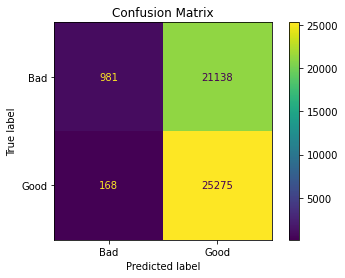

In [159]:
cm = confusion_matrix(y_test, rfc_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bad', 'Good'])
disp.plot();

plt.title("Confusion Matrix")
plt.show()

## Logistic Regression

In [99]:
lr = LogisticRegression(max_iter=500, random_state=42)

In [100]:
lr_pipe_gs = Pipeline([('tfidf',tfidf), ('lr',lr)])

In [160]:
lr_pipe_gs_params = {'lr__penalty':['l2'],
                 'lr__C': [0.25, 0.5, 0.7]}

In [161]:
lr_gs = GridSearchCV(lr_pipe_gs, lr_pipe_gs_params, error_score='raise')

In [162]:
model_lr = lr_gs.fit(X_train, y_train)

In [163]:
lr_pred_test = lr_gs.predict(X_test)

In [164]:
lr_pred_train = lr_gs.predict(X_train)

In [165]:
model_lr.best_params_

{'lr__C': 0.7, 'lr__penalty': 'l2'}

In [166]:
model_lr.score(X_train,y_train)

0.8317354190320003

In [167]:
model_lr.score(X_test,y_test)

0.7867415163365712

In [168]:
print(classification_report(y_test, lr_pred_test, target_names=['Bad', 'Good']))


              precision    recall  f1-score   support

         Bad       0.78      0.76      0.77     22119
        Good       0.80      0.81      0.80     25443

    accuracy                           0.79     47562
   macro avg       0.79      0.79      0.79     47562
weighted avg       0.79      0.79      0.79     47562



In [169]:
print(classification_report(y_train, lr_pred_train, target_names=['Bad','Good']))


              precision    recall  f1-score   support

         Bad       0.83      0.81      0.82     66743
        Good       0.84      0.85      0.84     75943

    accuracy                           0.83    142686
   macro avg       0.83      0.83      0.83    142686
weighted avg       0.83      0.83      0.83    142686



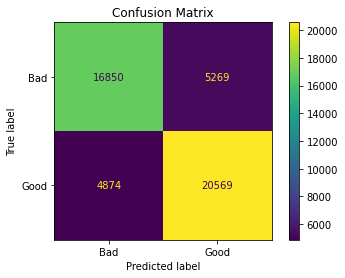

In [170]:
cm = confusion_matrix(y_test, lr_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bad', 'Good'])
disp.plot();

plt.title("Confusion Matrix")
plt.show()

## XG Boost Classifier

In [133]:
xgc = XGBClassifier(random_state = 42)

In [134]:
xgc_pipe_gs = Pipeline([('tfidf',tfidf), ('xgc',xgc)])

In [135]:
xgc_pipe_gs_params = {'xgc__max_depth':[7,9],
                      'xgc__alpha': [0.1, 0.5]}

In [136]:
xgc_gs = GridSearchCV(xgc_pipe_gs, xgc_pipe_gs_params, cv=5, verbose=1, error_score='raise')

In [137]:
model_xgc = xgc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [138]:
xgc_pred_test = xgc_gs.predict(X_test)

In [139]:
xgc_pred_train = xgc_gs.predict(X_train)

In [140]:
model_xgc.score(X_train,y_train)

0.7895168411757285

In [141]:
model_xgc.score(X_test,y_test)

0.7527017366805433

In [142]:
model_xgc.best_params_

{'xgc__alpha': 0.1, 'xgc__max_depth': 9}

In [143]:
print(classification_report(y_test, xgc_pred_test, target_names=['Bad','Good']))

              precision    recall  f1-score   support

         Bad       0.73      0.73      0.73     22119
        Good       0.77      0.77      0.77     25443

    accuracy                           0.75     47562
   macro avg       0.75      0.75      0.75     47562
weighted avg       0.75      0.75      0.75     47562



In [144]:
print(classification_report(y_train, xgc_pred_train, target_names=['Bad','Good']))

              precision    recall  f1-score   support

         Bad       0.78      0.77      0.77     66743
        Good       0.80      0.81      0.80     75943

    accuracy                           0.79    142686
   macro avg       0.79      0.79      0.79    142686
weighted avg       0.79      0.79      0.79    142686



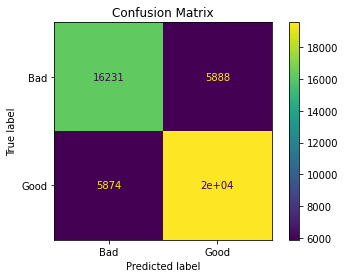

In [145]:
cm = confusion_matrix(y_test, xgc_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bad', 'Good'])
disp.plot();

plt.title("Confusion Matrix")
plt.show()

# Main Discussion

| Model                            | Train Accuracy (%) | Test Accuracy (%) | No. False Positive|
|:--------------------------------:|:------------------:|:-----------------:|:-----------------:|
| Naive Bayes (Tuned)              | 87.0               | 81.4              | 5435              |
| Random Forest Classifier (Tuned) | 55.2               | 55.2              | 168               |
| XG Boost Classifier (Tuned)      | 78.9               | 75.2              | 5874              |
| Logistic Regression (Tuned)      | 83.1               | 78.6              | 4874              |

Upon analyzing the results in the table, we observe interesting patterns in the performance of different classifiers. The Random Forest Classifier (RFC) exhibits a commendable attribute with a low number of false positive cases, standing at just 168. However, when considering the overall accuracy, both the training and testing scores are at 55.2%. While this indicates room for improvement, it also suggests that the model's predictions may not be entirely reliable, as there is a 45% chance of incorrect predictions.

Moving on to the XGBoost Classifier (XBC), we find that it demonstrates higher accuracy scores compared to the RFC. With training and testing accuracies of 78.9% and 75.2% respectively, the XGBC showcases a more consistent performance. It is worth noting that although the XGBC has a lower percentage of overfitting compared to the Naive Bayes (NB) model at 3.7%, the number of false positive cases are higher than the other classifiers.

Lastly, the Logistic Regression (LR) model shows promising results. It attains accuracy scores of 83.1% in training and 78.6% in testing. Although a 4.5% overfitting is observed, it remains relatively low, given the context of the task. Moreover, the LR model exhibits the second-lowest number of false positive cases among the classifiers considered.

Taking all these factors into account, we can conclude that the Logistic Regression (LR) model emerges as the most suitable choice for movie quality prediction. It demonstrates consistent and respectable accuracy scores, maintaining a relatively low number of false positive cases. By leveraging LR, we can expect a reliable and effective model for the task at hand.

In summary, after carefully evaluating the strengths and weaknesses of each classifier, it is evident that the Logistic Regression (LR) model emerges as the most favorable option for accurately predicting movie quality. By selecting LR as our chosen model, we have effectively reduced the overfitting percentage from 6% to a more modest 4.5%. Additionally, we have significantly decreased the number of false positive cases by 561. By making this selection, we have increase the confidence in accuracy and precision of movie quality predictions. with the implementation of LR model, we can expect more accurate and trustworthy movie quality predictions, thereby enabling us to make more informed decisions based on the model's outputs.

# Hold Out Data

In [171]:
hold_out = pd.read_csv('./datasets/hold_out.csv')

In [172]:
hold_out.head()

,Genre,Title,Year_produced,Certificate,Ratings,Description,Actors,Actor_1,Actor_2,Actor_3,Actor_4
0,Comedy,Barbie,(2023),NaN,NaN,To live in Barbie Land is to be a perfect bein...,"['Margot Robbie', 'Ariana Greenblatt', 'Ryan G...",Margot Robbie,Ariana Greenblatt,Ryan Gosling,Helen Mirren
1,Comedy,Guardians of the Galaxy Vol. 3,(2023),13+,NaN,"Still reeling from the loss of Gamora, Peter Q...","['Chris Pratt', 'Zoe Saldana', 'Dave Bautista'...",Chris Pratt,Zoe Saldana,Dave Bautista,Vin Diesel
2,Comedy,Lilo & Stitch,NaN,NaN,NaN,Live-action remake of Disney's animated classi...,"['Sydney Agudong', 'Billy Magnussen', 'Tia Car...",Sydney Agudong,Billy Magnussen,Tia Carrere,Courtney B. Vance
3,Comedy,Wicked,(2024),NaN,NaN,The story of how a green-skinned woman framed ...,"['Michelle Yeoh', 'Cynthia Erivo', 'Jeff Goldb...",Michelle Yeoh,Cynthia Erivo,Jeff Goldblum,Ariana Grande
4,Comedy,White Men Can't Jump,(2023),R,NaN,A remake of the 1992 film about a pair of bask...,"['Sinqua Walls', 'Jack Harlow', 'Lance Reddick...",Sinqua Walls,Jack Harlow,Lance Reddick,Teyana Taylor


In [173]:
hold_out.drop(columns = ['Actors'], inplace = True)

In [174]:
hold_out['Description'].fillna('-', inplace=True)
hold_out['Actor_1'].fillna('-', inplace=True)
hold_out['Actor_2'].fillna('-', inplace=True)
hold_out['Actor_3'].fillna('-', inplace=True)
hold_out['Actor_4'].fillna('-', inplace=True)

In [177]:
hold_X = hold_out.drop(columns = ['Genre','Ratings', 'Year_produced'])

In [178]:
hold_X.head()

,Title,Certificate,Description,Actor_1,Actor_2,Actor_3,Actor_4
0,Barbie,NaN,To live in Barbie Land is to be a perfect bein...,Margot Robbie,Ariana Greenblatt,Ryan Gosling,Helen Mirren
1,Guardians of the Galaxy Vol. 3,13+,"Still reeling from the loss of Gamora, Peter Q...",Chris Pratt,Zoe Saldana,Dave Bautista,Vin Diesel
2,Lilo & Stitch,NaN,Live-action remake of Disney's animated classi...,Sydney Agudong,Billy Magnussen,Tia Carrere,Courtney B. Vance
3,Wicked,NaN,The story of how a green-skinned woman framed ...,Michelle Yeoh,Cynthia Erivo,Jeff Goldblum,Ariana Grande
4,White Men Can't Jump,R,A remake of the 1992 film about a pair of bask...,Sinqua Walls,Jack Harlow,Lance Reddick,Teyana Taylor


In [182]:
new_tokenize_hold_X = pd.DataFrame()
for i in tqdm(range(len(hold_X.columns))):
    tokenize_hold_X = hold_out[hold_X.columns[i]].apply(lambda x: word_tokenize(str(x).lower()))
    stem_hold_X = tokenize_hold_X.apply(lambda tokens: [stemmer.stem(token) for token in tokens])
    new_tokenize_hold_X[hold_X.columns[i]] = stem_hold_X

100%|████████████████████████████████████████████| 7/7 [03:45<00:00, 32.20s/it]


In [187]:
%%time
hold_X_df = pd.DataFrame()
for i in range(len(new_tokenize_hold_X.columns)):
    convert_to_string = new_tokenize_hold_X[new_tokenize_hold_X.columns[i]].apply(lambda x: ' '.join(x) if x else '')
    hold_X_df[new_tokenize_hold_X.columns[i]] = convert_to_string

CPU times: total: 750 ms
Wall time: 1.04 s


In [188]:
hold_X = hold_X_df['Title'] + ' ' + hold_X_df['Certificate'] + ' ' + hold_X_df['Description'] + ' ' + hold_X_df['Actor_1'] + ' ' + hold_X_df['Actor_2'] + ' ' + hold_X_df['Actor_3'] + ' ' + hold_X_df['Actor_4']

In [189]:
hold_X.reset_index(drop=True, inplace=True)

In [190]:
hold_X.head()

0    barbi nan to live in barbi land is to be a per...
1    guardian of the galaxi vol . 3 13+ still reel ...
2    lilo & stitch nan live-act remak of disney 's ...
3    wick nan the stori of how a green-skin woman f...
4    white men ca n't jump r a remak of the 1992 fi...
dtype: object

In [191]:
hold_out_test = lr_gs.predict(hold_X)

In [197]:
hold_out['Predictions'] = hold_out_test

In [199]:
hold_out['Predictions'] = hold_out['Predictions'].apply(lambda x: 'good' if x == 1 else 'bad')

In [202]:
hold_out.head()

,Genre,Title,Year_produced,Certificate,Ratings,Description,Actor_1,Actor_2,Actor_3,Actor_4,Predictions
0,Comedy,Barbie,(2023),NaN,NaN,To live in Barbie Land is to be a perfect bein...,Margot Robbie,Ariana Greenblatt,Ryan Gosling,Helen Mirren,bad
1,Comedy,Guardians of the Galaxy Vol. 3,(2023),13+,NaN,"Still reeling from the loss of Gamora, Peter Q...",Chris Pratt,Zoe Saldana,Dave Bautista,Vin Diesel,good
2,Comedy,Lilo & Stitch,NaN,NaN,NaN,Live-action remake of Disney's animated classi...,Sydney Agudong,Billy Magnussen,Tia Carrere,Courtney B. Vance,good
3,Comedy,Wicked,(2024),NaN,NaN,The story of how a green-skinned woman framed ...,Michelle Yeoh,Cynthia Erivo,Jeff Goldblum,Ariana Grande,bad
4,Comedy,White Men Can't Jump,(2023),R,NaN,A remake of the 1992 film about a pair of bask...,Sinqua Walls,Jack Harlow,Lance Reddick,Teyana Taylor,bad


Remarks:

Based on personal experience, barbie movies are bad whereas Guardians of the Galaxy movie sequels are excellent.

# Future Works

For future works, there are several steps that can be taken to address the overfitting of the Logistic Regression model and further improve its performance and potentially exploring other types of predictions.

1. Increasing computational power: With greater computational resources, you can perform more extensive hyperparameter tuning and model training. This allows for a more thorough exploration of the hyperparameter space, leading to better-tailored models and reduced overfitting.

2. Hyperparameter tuning: Fine-tuning the hyperparameters of the Logistic Regression model can help find the optimal configuration that minimizes overfitting. Parameters such as the regularization strength (e.g., C parameter in logistic regression), penalty type (L1 or L2), and solver type can be adjusted to strike a better balance between model complexity and generalization.

3. Feature engineering and dimensionality reduction: Careful feature engineering and selection can improve the model's performance. Analyze the relevance of each feature and consider removing any that are not contributing significantly to the prediction task. This can help reduce the dimensionality of the data and potentially alleviate overfitting.

4. Exploring other models: While Logistic Regression has shown promise, it is worth exploring other types of models, such as neural networks, which are known for their ability to capture complex patterns in data. Neural networks can handle non-linear relationships and might provide improved performance compared to Logistic Regression, especially in cases of more intricate and nuanced data.

5. Other types of predictions could be explored such as genre prediction, movie certificate classification and recommendation of actors for movies.

# Conclusion

In conclusion, the objective of utilizing textual inputs to develop a model for accurately assessing the quality of movies has been successfully achieved. Among the different models evaluated, the Logistic Regression model has demonstrated its superiority and emerged as the most favorable option for this project.

By leveraging the Logistic Regression model, filmmakers and industry professionals can now make more informed decisions in various aspects, including resource allocation, critical reception, and audience engagement. The model's ability to accurately predict movie quality based on textual inputs empowers decision-makers to optimize their strategies and make well-informed choices.

This project opens up new possibilities for the film industry by providing a reliable and effective tool for assessing movie quality. The integration of textural inputs and the Logistic Regression model's predictive capabilities offer a valuable resource for filmmakers to enhance their understanding of audience preferences, improve critical reception, and optimize resource allocation.

Overall, this project demonstrates the potential of leveraging advanced machine learning techniques and textual data analysis to drive informed decision-making in the film industry. The successful implementation of the Logistic Regression model paves the way for future advancements and applications in the field, enabling continued growth and innovation in movie quality assessment and related areas.